# Lab4 
## Структури для роботи з великими обсягами даних в Python
 **Мета**: отримати навички роботи із структурами для зберігання в Python (python, numpy, pandas, numpy array, dataframe, timeit) <br>
**Основні поняття**: numpy масиви, кортежі, списки, фрейми,профілювання.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import timeit
import fuzzywuzzy
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

### Таймер для підрахунку часу роботи функції

In [2]:
def timer(function, number=1):
    execution_time = timeit.timeit(function, number=number)
    print(f"Execution time: {execution_time:.6f} seconds")
    return f'{execution_time:.6f}'

## Завдання другого рівня
Виконати всі завдання, використовуючи як numpy array, так і
dataframe
1. Поборотися із зниклими даними. Для цього в допомогу вам Медіум
(https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).
2. Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).
3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.
4. Збудувати графік залежності одного integer/real атрибута від іншого.
5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.
6. Провести One Hot Encoding категоріального string атрибуту.
7. Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі -https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

Додаткове завдання:
8. Поділити випадковим чином датасет на дві рівні частини. Навчити 3
регресійні моделі на основі не менше одного атрибуту відновлювати
інший. Навчання має відбуватися на основі першого датасету
(https://scikit-learn.org/stable/modules/linear_model.html), візуалізувати
моделі та на основі середньої квадратичної помилки (https://scikitlearn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) вибрати найкращу.

## Reading with pandas

In [3]:
data = 'garments_worker_productivity.csv'

### Understanding atributes<br>
01	date			:	Date in MM-DD-YYYY <br>
02	day			:	Day of the Week<br>
03	quarter			:	A portion of the month. A month was divided into four quarters<br>
04	department		:	Associated department with the instance<br>
05	team_no			:	Associated team number with the instance<br>
06	no_of_workers		:	Number of workers in each team<br>
07	no_of_style_change	:	Number of changes in the style of a particular product<br>
08	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.<br>
09	smv			:	Standard Minute Value, it is the allocated time for a task<br>
10	wip			:	Work in progress. Includes the number of unfinished items for products<br>
11	over_time		:	Represents the amount of overtime by each team in minutes<br>
12	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
13	idle_time		:	The amount of time when the production was interrupted due to several reasons<br>
14	idle_men		:	The number of workers who were idle due to production interruption<br>
15	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>

In [4]:
df = pd.read_csv(data,header=0, sep=',')

In [5]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


## Cleaning with pandas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
df['team'] = df['team'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Cleaning column 'department'

In [8]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [9]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 90):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [10]:
replace_matches_in_column(df=df, column='department', string_to_match="finishing")

All done!


In [11]:
df["department"].unique()

array(['sweing', 'finishing'], dtype=object)

### Cleaning NaN values

In [12]:
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [14]:
filtered_df_1 = df[df['wip'].notnull()]
filtered_df_1

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


In [15]:
filtered_df_2 = df[df['wip'].isnull()]
filtered_df_2

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [16]:
filtered_df_1["department"].unique()

array(['sweing'], dtype=object)

In [17]:
filtered_df_2["department"].unique()

array(['finishing'], dtype=object)

**wip: Work in progress. Includes the number of unfinished items for products** <br>
So we can assume that NaN in column "wip" is set only for department "finishing" and it means that we can change it to 0 because it displays that there is no number of unfinished items for products when it goes to department finishing

In [18]:
df = df.fillna(0)

In [19]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


## Reading with numpy

In [20]:
arr = df.to_numpy()
arr

array([['1/1/2015', 'Quarter1', 'sweing', ..., 0, 59.0, 0.940725424],
       ['1/1/2015', 'Quarter1', 'finishing', ..., 0, 8.0, 0.8865],
       ['1/1/2015', 'Quarter1', 'sweing', ..., 0, 30.5, 0.800570492],
       ...,
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, 8.0, 0.625625],
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, 15.0, 0.505888889],
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, 6.0, 0.394722222]],
      dtype=object)

In [21]:
arr[0]

array(['1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8, 0.8, 26.16,
       1108.0, 7080, 98, 0.0, 0, 0, 59.0, 0.940725424], dtype=object)

## 2. Normalization and standartization <br>
Пронормувати вибраний датасет або стандартизувати його
(нормалізація і стандартизація мають бути реалізовані як окремі
функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

### Normalization

In [22]:
df_sel_types = df.select_dtypes(include=['number']).drop(columns=['team',"no_of_workers","no_of_style_change"])
df_norm = (df_sel_types- df_sel_types.min()) / (df_sel_types.max() - df_sel_types.min())
df_to_concat=df.drop(columns=df_norm.columns.to_list())
df_normis = pd.concat((df_to_concat, df_norm), axis=1)

In [23]:
df_normis

,date,quarter,department,day,team,no_of_style_change,no_of_workers,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0,59.0,1.000000,0.450252,0.047920,0.273148,0.027222,0.0,0.0,0.797332
1,1/1/2015,Quarter1,finishing,Thursday,1,0,8.0,0.931507,0.020132,0.000000,0.037037,0.000000,0.0,0.0,0.736180
2,1/1/2015,Quarter1,sweing,Thursday,11,0,30.5,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.639274
3,1/1/2015,Quarter1,sweing,Thursday,12,0,30.5,1.000000,0.164731,0.041865,0.141204,0.013889,0.0,0.0,0.639274
4,1/1/2015,Quarter1,sweing,Thursday,6,0,56.0,1.000000,0.445219,0.050601,0.074074,0.013889,0.0,0.0,0.639062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0,8.0,0.931507,0.000000,0.000000,0.037037,0.000000,0.0,0.0,0.445036
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0,8.0,0.863014,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.441982
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0,8.0,0.794521,0.019357,0.000000,0.037037,0.000000,0.0,0.0,0.441982
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0,15.0,0.931507,0.000000,0.000000,0.069444,0.000000,0.0,0.0,0.306951


In [45]:
def f(array):
    array_copy = np.copy(array) 
    min_max_5 = (np.max(array_copy[:, 5]), np.min(array_copy[:, 5]))
    min_max_6 = (np.max(array_copy[:, 6]), np.min(array_copy[:, 6]))
    min_max_7 = (np.max(array_copy[:, 7]), np.min(array_copy[:, 7]))
    min_max_8 = (np.max(array_copy[:, 8]), np.min(array_copy[:, 8]))
    min_max_9 = (np.max(array_copy[:, 9]), np.min(array_copy[:, 9]))
    min_max_10 = (np.max(array_copy[:, 10]), np.min(array_copy[:, 10]))
    min_max_13 = (np.max(array_copy[:, 13]), np.min(array_copy[:, 13]))
    min_max_14 = (np.max(array_copy[:, 14]), np.min(array_copy[:, 14]))

    for i in range(array_copy.shape[0]):
        array_copy[i, 5] = (array_copy[i, 5] - min_max_5[1]) / (min_max_5[0] - min_max_5[1])
        array_copy[i, 6] = (array_copy[i, 6] - min_max_6[1]) / (min_max_6[0] - min_max_6[1])
        array_copy[i, 7] = (array_copy[i, 7] - min_max_7[1]) / (min_max_7[0] - min_max_7[1])
        array_copy[i, 8] = (array_copy[i, 8] - min_max_8[1]) / (min_max_8[0] - min_max_8[1])
        array_copy[i, 9] = (array_copy[i, 9] - min_max_9[1]) / (min_max_9[0] - min_max_9[1])
        array_copy[i, 10] = (array_copy[i, 10] - min_max_10[1]) / (min_max_10[0] - min_max_10[1])
        array_copy[i, 13] = (array_copy[i, 13] - min_max_13[1]) / (min_max_13[0] - min_max_13[1])
        array_copy[i, 14] = (array_copy[i, 14] - min_max_14[1]) / (min_max_14[0] - min_max_14[1])

    return array_copy

arr_normalized = f(arr)


### Standartization

In [31]:
df_sel_types = df.select_dtypes(include=['number'])
df_st = (df_sel_types-df_sel_types.mean())/df_sel_types.std()
df_stand = pd.concat([df.select_dtypes(exclude=['number']), df_st], axis=1)

In [32]:
df_stand

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,0.454133,0.718836,1.014128,0.277814,0.750275,0.373258,-0.057449,-0.112957,-0.351471,1.098770,1.178502
1,1/1/2015,Quarter1,finishing,Thursday,-1.566674,0.208064,-1.016353,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,0.867733
2,1/1/2015,Quarter1,sweing,Thursday,1.320193,0.718836,-0.333738,0.185379,-0.270979,0.073600,-0.057449,-0.112957,-0.351471,-0.185148,0.375266
3,1/1/2015,Quarter1,sweing,Thursday,1.608879,0.718836,-0.333738,0.185379,-0.270979,0.073600,-0.057449,-0.112957,-0.351471,-0.185148,0.375266
4,1/1/2015,Quarter1,sweing,Thursday,-0.123241,0.718836,0.990369,0.318749,-0.790564,0.073600,-0.057449,-0.112957,-0.351471,0.963620,0.374186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,1.031506,0.208064,-1.111389,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,-0.611835
1193,3/11/2015,Quarter2,finishing,Wednesday,0.454133,-0.302708,-1.020008,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,-0.627356
1194,3/11/2015,Quarter2,finishing,Wednesday,0.165446,-0.813481,-1.020008,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,-0.627356
1195,3/11/2015,Quarter2,finishing,Wednesday,0.742819,0.208064,-1.111389,-0.453741,-0.826398,-0.238543,-0.057449,-0.112957,-0.351471,-0.883419,-1.313571


In [60]:
def s2():
    array_copy = np.copy(arr) 
    mean_std_5 = (np.mean(array_copy[:, 5]), np.std(array_copy[:, 5]))
    mean_std_6 = (np.mean(array_copy[:, 6]), np.std(array_copy[:, 6]))
    mean_std_7 = (np.mean(array_copy[:, 7]), np.std(array_copy[:, 7]))
    mean_std_8 = (np.mean(array_copy[:, 8]), np.std(array_copy[:, 8]))
    mean_std_9 = (np.mean(array_copy[:, 9]), np.std(array_copy[:, 9]))
    mean_std_10 = (np.mean(array_copy[:, 10]), np.std(array_copy[:, 10]))
    mean_std_13 = (np.mean(array_copy[:, 13]), np.std(array_copy[:, 13]))
    mean_std_14 = (np.mean(array_copy[:, 14]), np.std(array_copy[:, 14]))

    for i in range(array_copy.shape[0]):
        array_copy[i, 5] = (array_copy[i, 5] - mean_std_5[0]) / mean_std_5[1]
        array_copy[i, 6] = (array_copy[i, 6] - mean_std_6[0]) / mean_std_6[1]
        array_copy[i, 7] = (array_copy[i, 7] - mean_std_7[0]) / mean_std_7[1]
        array_copy[i, 8] = (array_copy[i, 8] - mean_std_8[0]) / mean_std_8[1]
        array_copy[i, 9] = (array_copy[i, 9] - mean_std_9[0]) / mean_std_9[1]
        array_copy[i, 10] = (array_copy[i, 10] - mean_std_10[0]) / mean_std_10[1]
        array_copy[i, 13] = (array_copy[i, 13] - mean_std_13[0]) / mean_std_13[1]
        array_copy[i, 14] = (array_copy[i, 14] - mean_std_14[0]) / mean_std_14[1]

    return array_copy
arr_stand = s2()

In [61]:
arr_stand

array([['1/1/2015', 'Quarter1', 'sweing', ..., 0, 1.099228797494696,
        1.1789944887241621],
       ['1/1/2015', 'Quarter1', 'finishing', ..., 0, -1.1992682191403,
        0.8680956374918086],
       ['1/1/2015', 'Quarter1', 'sweing', ..., 0, -0.18522541768368408,
        0.37542295089075417],
       ...,
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0, -1.1992682191403,
        -0.6276185834839484],
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0,
        -0.8837882364649082, -1.3141197966589626],
       ['3/11/2015', 'Quarter2', 'finishing', ..., 0,
        -1.2894053570475545, -1.9514885162770799]], dtype=object)

In [62]:
arr_stand[0]

array(['1/1/2015', 'Quarter1', 'sweing', 'Thursday', 8,
       0.7191368337605344, 1.0145521433346982, 0.2779299545557099,
       0.7505889183804769, 0.37341414161365943, -0.05747269159863287, 0,
       0, 1.099228797494696, 1.1789944887241621], dtype=object)

In [51]:
df_stand

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,0.454133,0.718836,1.014128,0.277814,0.750275,0.373258,-0.057449,-0.112957,-0.351471,1.098770,1.178502
1,1/1/2015,Quarter1,finishing,Thursday,-1.566674,0.208064,-1.016353,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,0.867733
2,1/1/2015,Quarter1,sweing,Thursday,1.320193,0.718836,-0.333738,0.185379,-0.270979,0.073600,-0.057449,-0.112957,-0.351471,-0.185148,0.375266
3,1/1/2015,Quarter1,sweing,Thursday,1.608879,0.718836,-0.333738,0.185379,-0.270979,0.073600,-0.057449,-0.112957,-0.351471,-0.185148,0.375266
4,1/1/2015,Quarter1,sweing,Thursday,-0.123241,0.718836,0.990369,0.318749,-0.790564,0.073600,-0.057449,-0.112957,-0.351471,0.963620,0.374186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,1.031506,0.208064,-1.111389,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,-0.611835
1193,3/11/2015,Quarter2,finishing,Wednesday,0.454133,-0.302708,-1.020008,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,-0.627356
1194,3/11/2015,Quarter2,finishing,Wednesday,0.165446,-0.813481,-1.020008,-0.453741,-1.077232,-0.238543,-0.057449,-0.112957,-0.351471,-1.198767,-0.627356
1195,3/11/2015,Quarter2,finishing,Wednesday,0.742819,0.208064,-1.111389,-0.453741,-0.826398,-0.238543,-0.057449,-0.112957,-0.351471,-0.883419,-1.313571


### 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

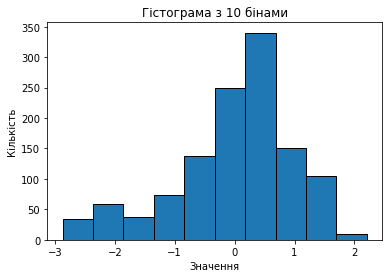

In [33]:
plt.hist(df_stand['actual_productivity'], bins=10, edgecolor='black')
plt.xlabel('Значення')
plt.ylabel('Кількість')
plt.title('Гістограма з 10 бінами')
plt.show()

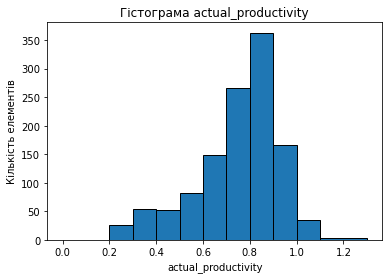

In [34]:
attribute_to_plot = 'actual_productivity'
custom_bins = [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.3]
plt.hist(df[attribute_to_plot], bins=custom_bins, edgecolor='k')
plt.xlabel(attribute_to_plot)
plt.ylabel('Кількість елементів')
plt.title(f'Гістограма {attribute_to_plot}')
plt.show()

### 4. Збудувати графік залежності одного integer/real атрибута від іншого.

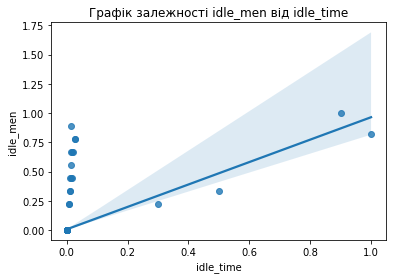

In [35]:
def graph_4(atr1, atr2):
    sns.regplot(x = df_normis[atr1], y = df_normis[atr2])
    plt.xlabel(atr1)
    plt.ylabel(atr2)
    plt.title(f'Графік залежності {atr2} від {atr1}')
    plt.show()
graph_4('idle_time', 'idle_men')

### 5. Підрахувати коефіцієнт Пірсона та Спірсона(Спірмена???) для двох integer/real атрибутів.

In [36]:
def pearson(atr1, atr2):
    x = df[atr1]
    y = df[atr2]
    k, p = scipy.stats.pearsonr(x, y)
    return k, p
def spearman(atr1, atr2):
    x = df[atr1]
    y = df[atr2]
    k, p = scipy.stats.spearmanr(x, y)
    return k, p

In [37]:
lst = df.select_dtypes(include=['number']).columns.to_list()
for i in range(len(lst) - 1):
    atr1 = lst[i]
    atr2 = lst[i + 1]
    correlation_coefficient, p_value = pearson(atr1, atr2)
    print(f"Кореляція між {atr1} і {atr2}: коефіцієнт = {correlation_coefficient}, p-значення = {p_value}")

Кореляція між team і targeted_productivity: коефіцієнт = 0.0302743463579372, p-значення = 0.2952988934688718
Кореляція між targeted_productivity і smv: коефіцієнт = -0.06948887331582096, p-значення = 0.01619241099600951
Кореляція між smv і wip: коефіцієнт = 0.3227038601340058, p-значення = 2.067396397438896e-30
Кореляція між wip і over_time: коефіцієнт = 0.2765285669357055, p-значення = 1.8822356600104662e-22
Кореляція між over_time і incentive: коефіцієнт = -0.004793251624663186, p-значення = 0.8684220761515006
Кореляція між incentive і idle_time: коефіцієнт = -0.012023621339270919, p-значення = 0.6777247553528513
Кореляція між idle_time і idle_men: коефіцієнт = 0.5591459152184024, p-значення = 2.1422503153392004e-99
Кореляція між idle_men і no_of_style_change: коефіцієнт = 0.13363169943000336, p-значення = 3.4952449845384204e-06
Кореляція між no_of_style_change і no_of_workers: коефіцієнт = 0.32778652078115234, p-значення = 2.2351429403680365e-31
Кореляція між no_of_workers і actual_

In [38]:
for i in range(len(lst) - 1):
    atr1 = lst[i]
    atr2 = lst[i + 1]
    correlation_coefficient, p_value = spearman(atr1, atr2)
    print(f"Кореляція між {atr1} і {atr2}: коефіцієнт = {correlation_coefficient}, p-значення = {p_value}")

Кореляція між team і targeted_productivity: коефіцієнт = 0.037132947916724335, p-значення = 0.19920681515534294
Кореляція між targeted_productivity і smv: коефіцієнт = -0.0913225016507916, p-значення = 0.0015622886827024167
Кореляція між smv і wip: коефіцієнт = 0.7351683924219647, p-значення = 5.3402153183466015e-204
Кореляція між wip і over_time: коефіцієнт = 0.6608216709540443, p-значення = 4.134243470191946e-151
Кореляція між over_time і incentive: коефіцієнт = 0.5389557411764794, p-значення = 3.842001914505261e-91
Кореляція між incentive і idle_time: коефіцієнт = -0.05379839356496326, p-значення = 0.06278613689669678
Кореляція між idle_time і idle_men: коефіцієнт = 0.9999644946834236, p-значення = 0.0
Кореляція між idle_men і no_of_style_change: коефіцієнт = 0.14426566089751466, p-значення = 5.378742867369879e-07
Кореляція між no_of_style_change і no_of_workers: коефіцієнт = 0.33809218843760536, p-значення = 2.1541657555029856e-33
Кореляція між no_of_workers і actual_productivity: 

### 6. Провести One Hot Encoding категоріального string атрибуту.

In [39]:
df_encoded = pd.get_dummies(df, columns=['department'], prefix = "department")
df_encoded

,date,quarter,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_finishing,department_sweing
0,1/1/2015,Quarter1,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,0,1
1,1/1/2015,Quarter1,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0
2,1/1/2015,Quarter1,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
3,1/1/2015,Quarter1,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,1
4,1/1/2015,Quarter1,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,1,0
1193,3/11/2015,Quarter2,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,1,0
1194,3/11/2015,Quarter2,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,1,0
1195,3/11/2015,Quarter2,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,1,0


### 7. Провести візуалізацію багатовимірних даних<br>
використовуючи приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

In [40]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


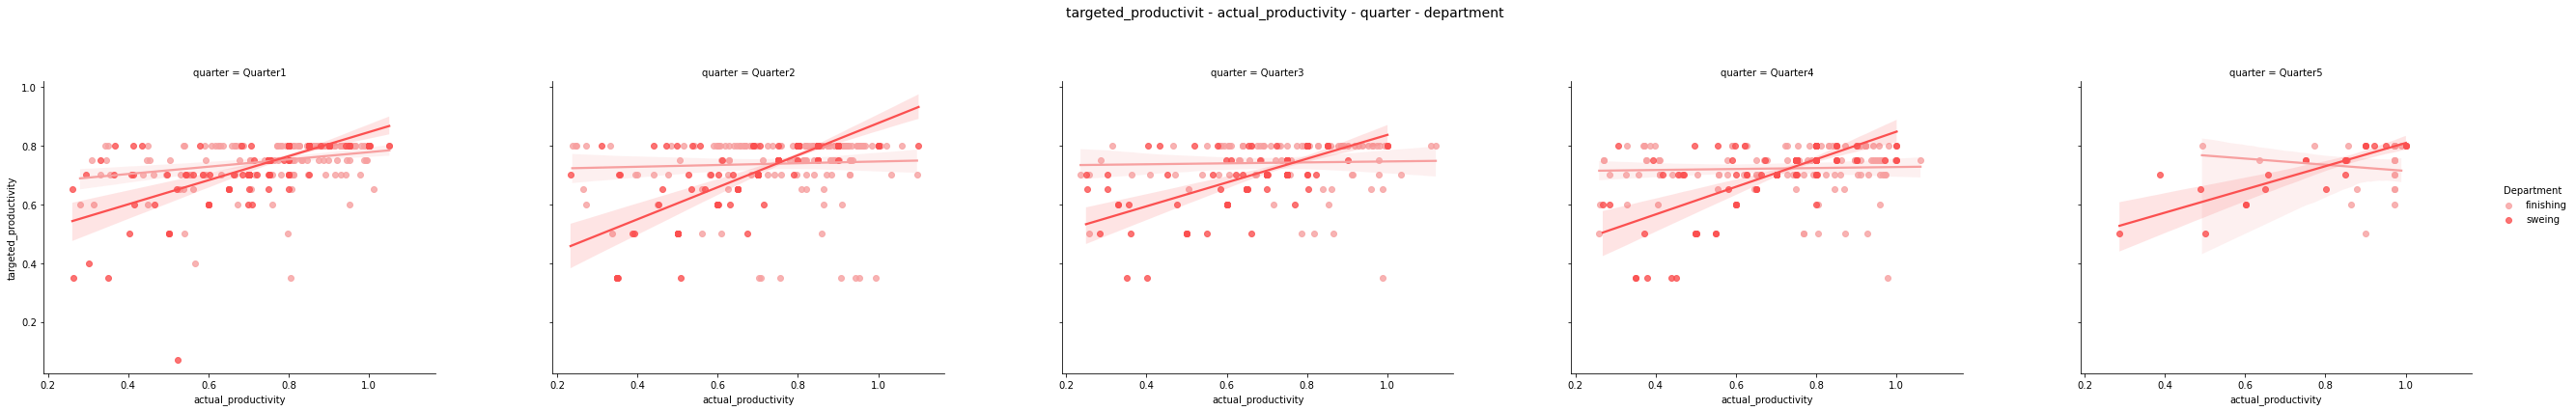

In [41]:
g = sns.FacetGrid(df, hue="department", col='quarter', 
                  hue_order=['finishing', 'sweing'], col_order=['Quarter1', 'Quarter2', 'Quarter3', "Quarter4", "Quarter5"],
                 aspect= 1.2, height=6, palette=sns.light_palette('red', 4)[1:5])
g.map(sns.regplot, "actual_productivity", "targeted_productivity", )
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('targeted_productivit - actual_productivity - quarter - department', fontsize=14)
l = g.add_legend(title='Department')

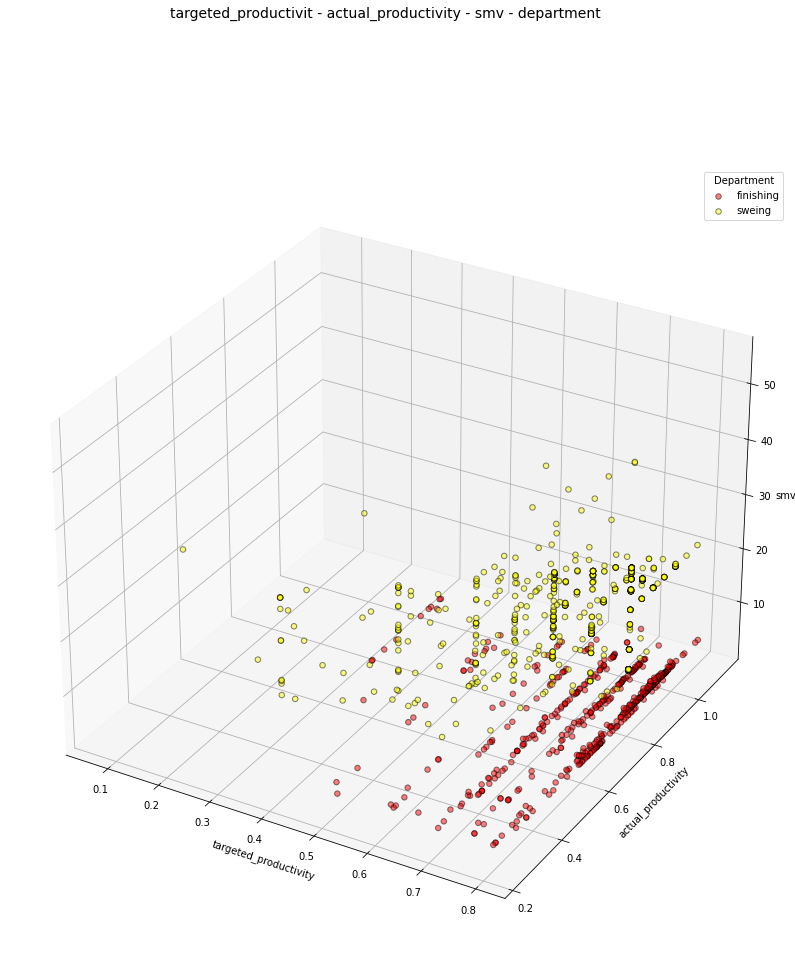

In [42]:
fig = plt.figure(figsize=(14, 16))
t = fig.suptitle('targeted_productivit - actual_productivity - smv - department', fontsize=14)
ax = fig.add_subplot(111, projection='3d')
colors = ['red' if i == 'finishing' else 'yellow' for i in list(df['department'])]

finishing_mask = df['department'] == 'finishing'
sweing_mask = df['department'] == 'sweing'

ax.scatter(xs=df[finishing_mask]['targeted_productivity'], ys=df[finishing_mask]['actual_productivity'], 
           zs=df[finishing_mask]['smv'], alpha=0.5, c='red', edgecolors='black', s=30, label='finishing')

ax.scatter(xs=df[sweing_mask]['targeted_productivity'], ys=df[sweing_mask]['actual_productivity'], 
           zs=df[sweing_mask]['smv'], alpha=0.5, c='yellow', edgecolors='black', s=30, label='sweing')
ax.set_xlabel('targeted_productivity')
ax.set_ylabel('actual_productivity')
ax.set_zlabel('smv')
ax.legend(title='Department')